# ft_linear_regression
The goal of this notebook is to demonstrate how to implement linear regression on a simple dataset and show how it works.

## Setup

### Imports

In [2]:
import pandas as pd
from pandas import DataFrame as DF
import numpy as np
import matplotlib.pyplot as plt

### Data extraction

<Axes: xlabel='km', ylabel='price'>

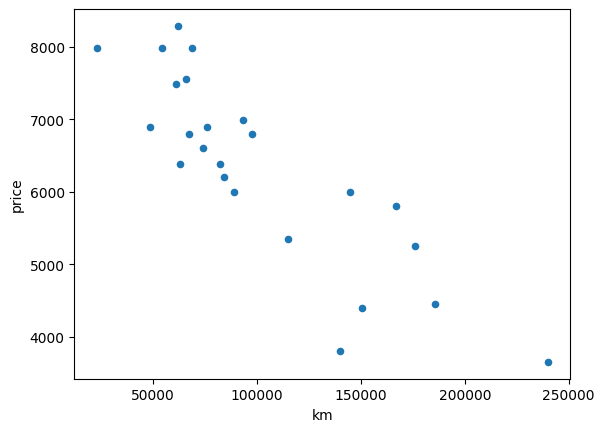

In [3]:
dataset = pd.read_csv("data.csv").dropna(how="any")
dataset_size = len(dataset)

dataset.plot.scatter(x="km", y="price")

In [4]:
dataset

,km,price
0,240000,3650
1,139800,3800
2,150500,4400
3,185530,4450
4,176000,5250
5,114800,5350
6,166800,5800
7,89000,5990
8,144500,5999
9,84000,6200


## linear regression fitting

### standard scalling

In [5]:
means = dataset.mean()
stds = dataset.std()
std_scaled_dataset:DF = (dataset - means) / stds

<Axes: xlabel='km', ylabel='price'>

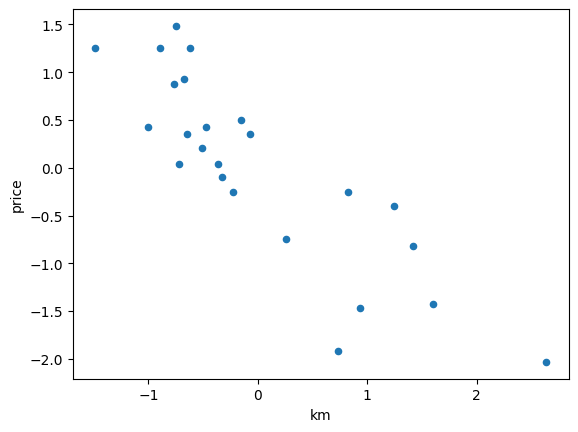

In [6]:
std_scaled_dataset.plot.scatter(x="km", y="price")

###  Slope and intercept fitting

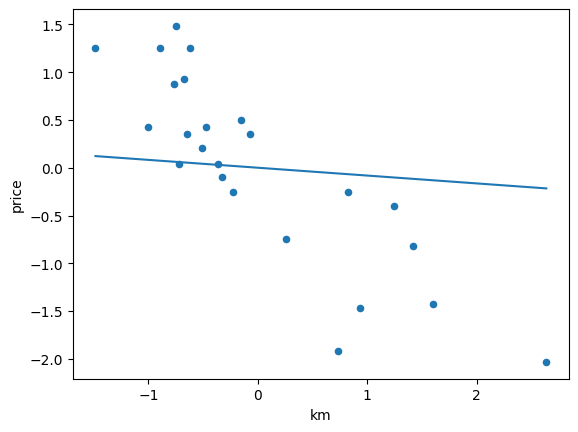

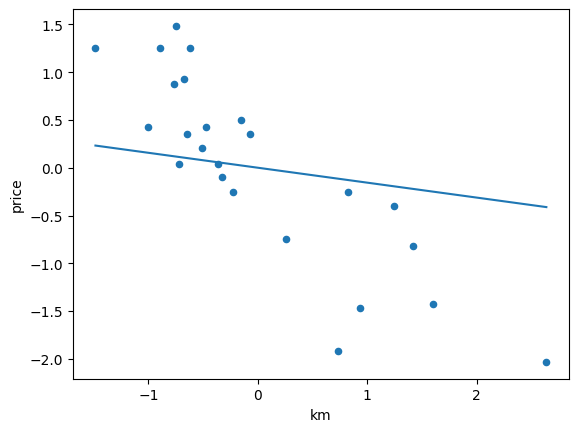

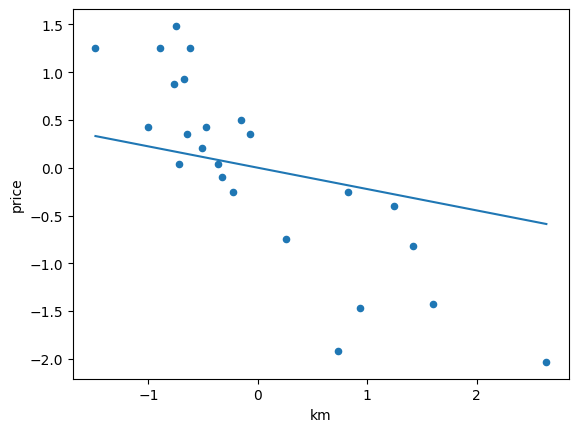

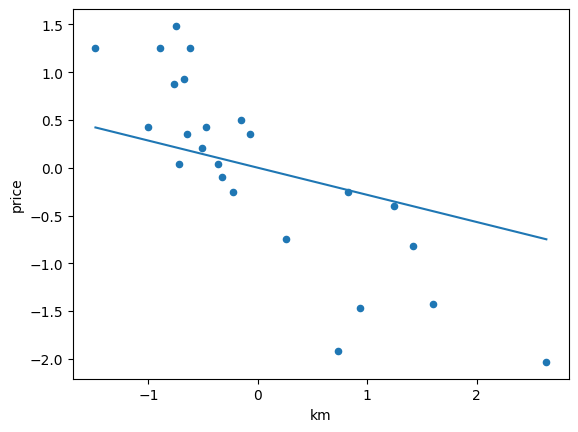

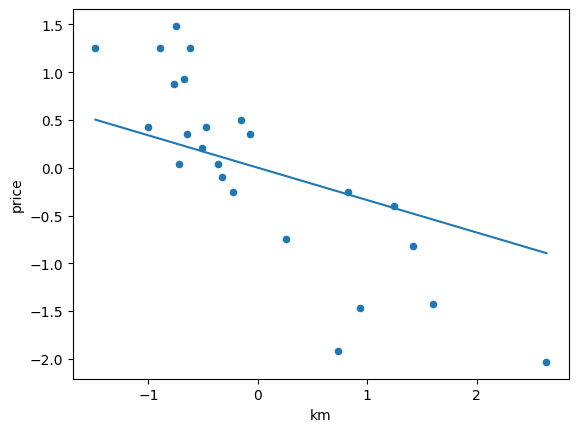

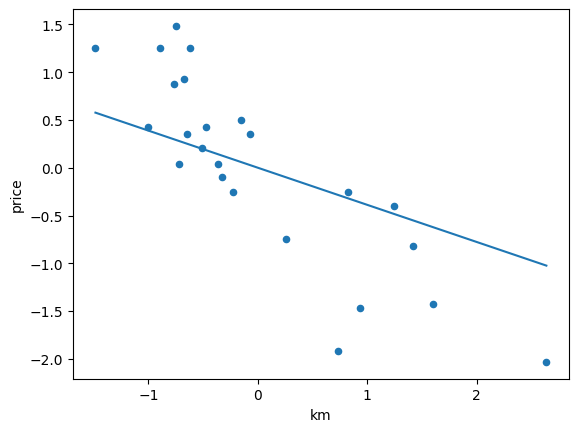

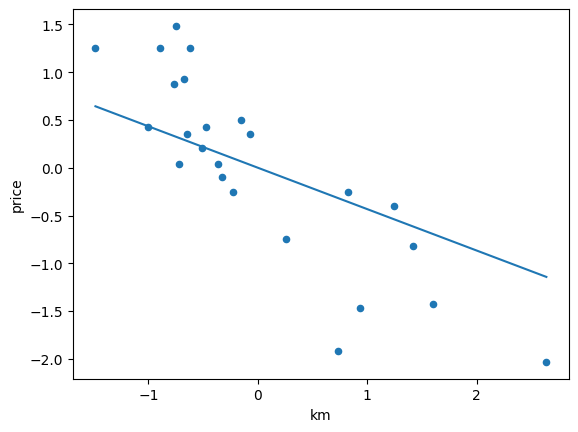

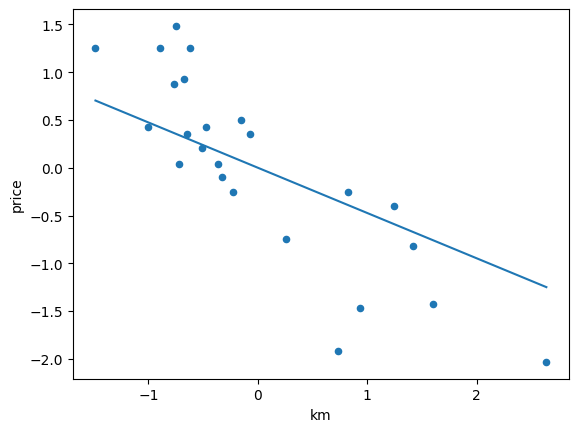

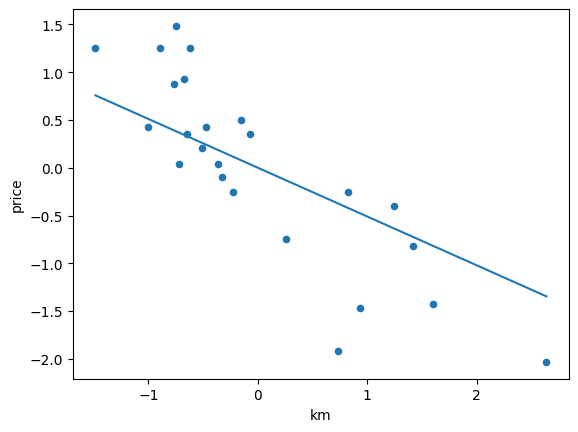

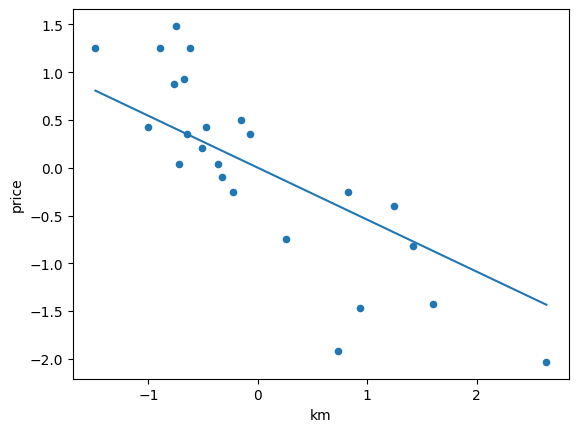

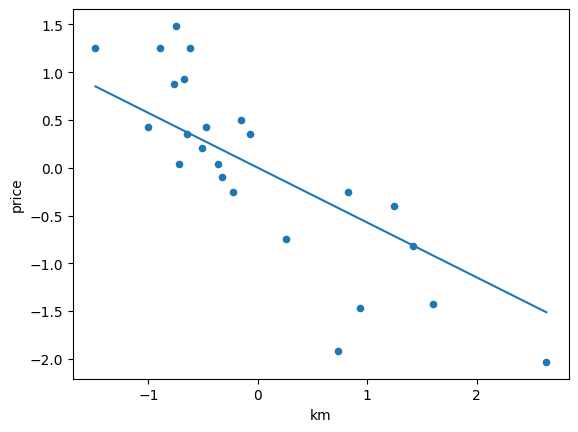

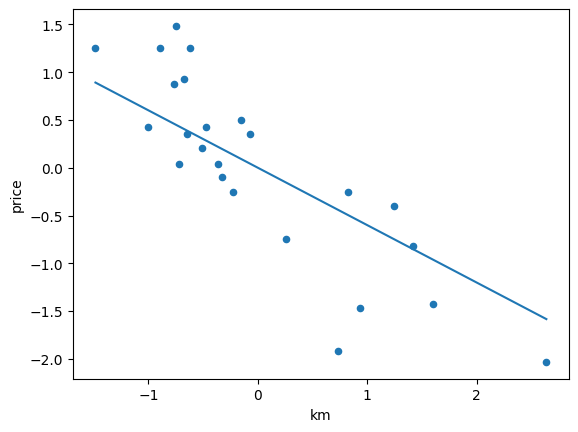

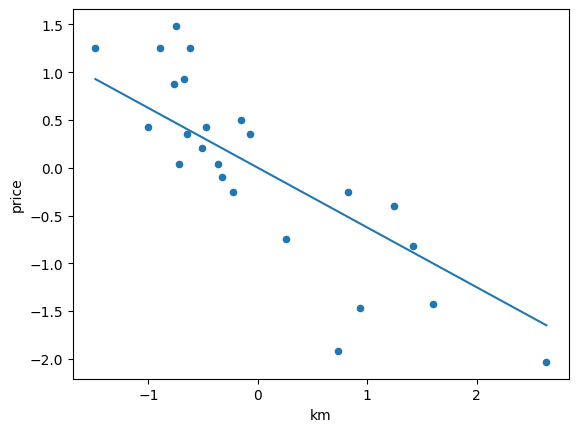

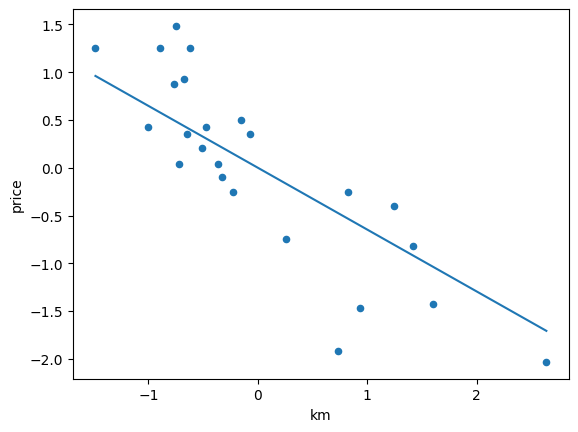

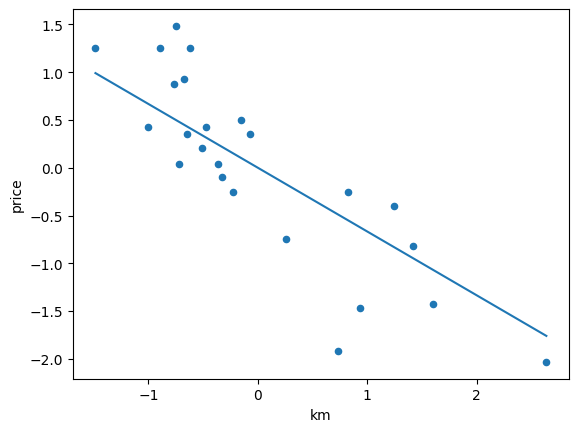

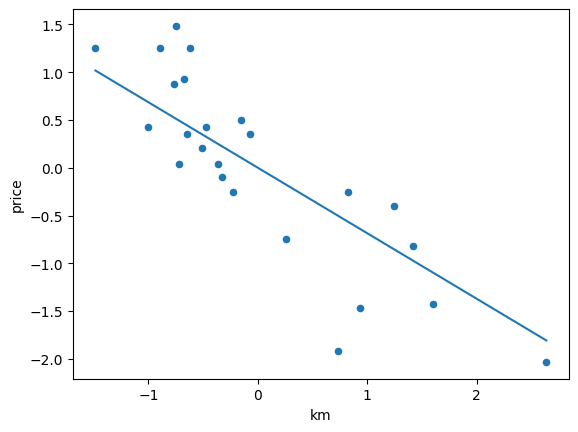

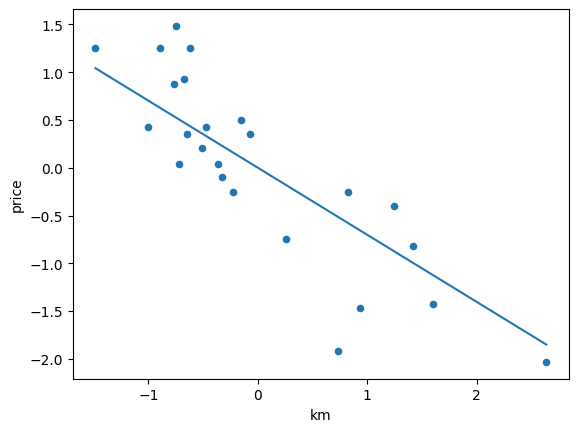

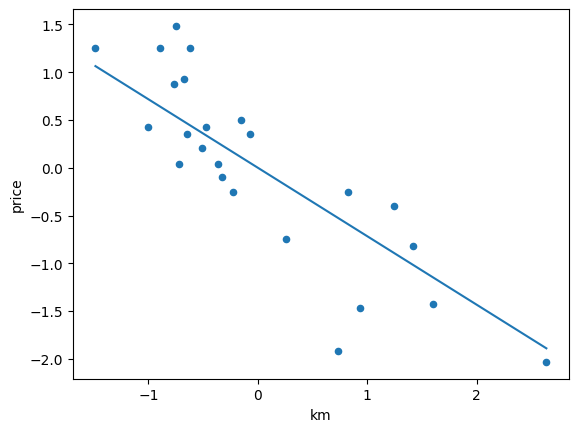

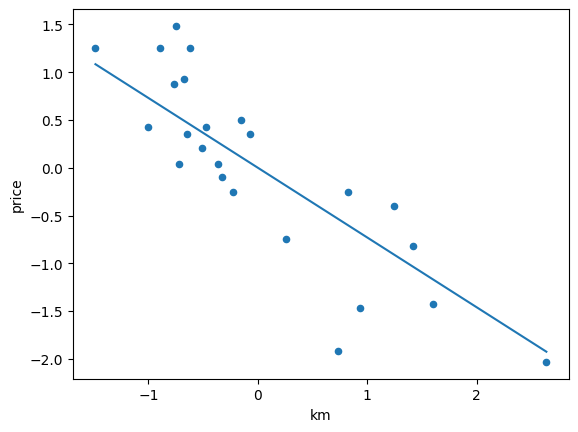

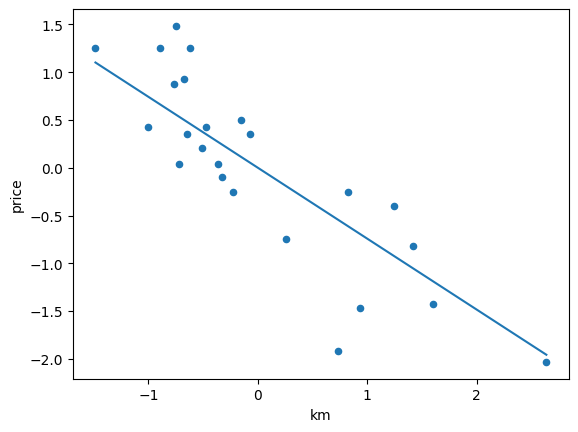

In [7]:
def predict(theta_0:float, theta_1:float, km:float) -> float:
    return theta_0 + theta_1 * km

LEARNING_RATE = 0.1

theta_0 = 0
theta_1 = 0



for epoch_idx in range(20):
    std_scaled_dataset:DF = (
        std_scaled_dataset
        .eval(f"estimated_price = {theta_0} + {theta_1} * km")
        .eval(f"residual = estimated_price - price")
    )
    
    tmp_theta_0 = LEARNING_RATE * std_scaled_dataset["residual"].sum() / dataset_size
    tmp_theta_1 = LEARNING_RATE * std_scaled_dataset.eval("residual * km").sum() / dataset_size

    theta_0 -= tmp_theta_0
    theta_1 -= tmp_theta_1

    ax = std_scaled_dataset.plot.scatter(x="km", y="price")
    ax.plot(
        [std_scaled_dataset["km"].min(), std_scaled_dataset["km"].max()],
        [
            predict(theta_0, theta_1, std_scaled_dataset["km"].min()),
            predict(theta_0, theta_1, std_scaled_dataset["km"].max())
        ]
    )

## Saving params

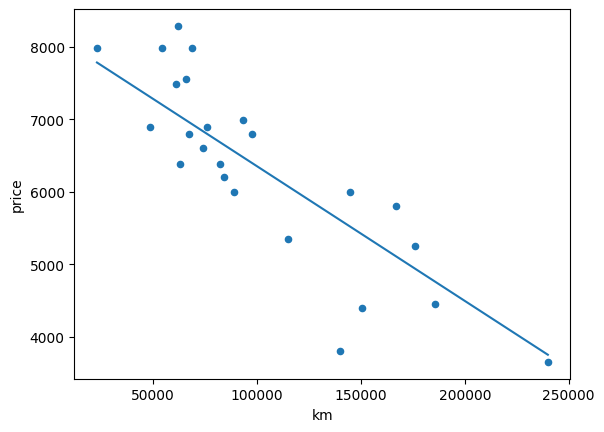

In [8]:
real_theta_1 = (stds["price"] * theta_1) / stds["km"]
real_theta_0 = stds["price"] * theta_0 + means["price"] - real_theta_1 * means["km"]

ax = dataset.plot.scatter(x="km", y="price")
ax.plot(
    [dataset["km"].min(), dataset["km"].max()],
    [
        predict(real_theta_0, real_theta_1, dataset["km"].min()),
        predict(real_theta_0, real_theta_1, dataset["km"].max())
    ]
)